# Price Using an LSTM with 50 Units (Neurons)

In this activity, we will examine the stock price of Amazon for the last 5 years—that is, from January 1, 2014, to December 31, 2018. In doing so, we will try to predict and forecast the company's future trend for January 2019 using an RNN and LSTM. We have the actual values for January 2019, so we can compare our predictions to the actual values later. Follow these steps to complete this activity:

### 1. Import the required libraries.

In [3]:
import pandas as pd 
import numpy as np
from tensorflow import random
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

### 2. From the full dataset, extract the Open column as the predictions will be made on the open stock value.


In [4]:
dataset_training = pd.read_csv('../AMZN_train.csv')
dataset_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [5]:
training_data=dataset_training[['Open']].values
training_data

array([[ 398.799988],
       [ 398.290009],
       [ 395.850006],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

### 3. Normalize the data between 0 and 1.

In [6]:
scaler = MinMaxScaler()
training_data_scaled = scaler.fit_transform(training_data)
training_data_scaled

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [7]:
training_data_scaled.shape

(1258, 1)

### 4. Then, create timestamps. The values of each day in January 2019 will be predicted by the previous 60 days; so, if January 1 is predicted by using the value from the nth day up to December 31, then January 2 will be predicted by using the n + 1st day and January 1, and so on.

In [8]:
X_train = []
y_train =[]

for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


### 5. Reshape the data into three dimensions since the network needs data in three dimensions.

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

### 6. Build an RNN model in Keras using 50 units (here, units refer to neurons) with four LSTM layers. The first step should provide the input shape. Note that the final LSTM layer always adds return_sequences=True, so it doesn't have to be explicitly defined.

In [10]:
SEED = 1
np.random.seed(SEED)
random.set_seed(SEED)

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0175
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 5/100
1198/1198 [==============================] - 7s 5ms/step - loss: 9.6404e-04
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 7/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0012
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 9.6483e-04
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 8.8434e-04
Epoch 12/100
1198/1198 [==============================] - 8s 7

In [ ]:
model.save(saved_model)

### 7. Process and prepare the test data that is the actual data for January 2019.
### 8. Combine and process the training and test data.

In [11]:
dataset_test = pd.read_csv('../AMZN_test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/19,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,1/3/19,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,1/4/19,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,1/7/19,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,1/8/19,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400
5,1/9/19,1652.979980,1667.800049,1641.400024,1659.420044,1659.420044,6348800
6,1/10/19,1641.010010,1663.250000,1621.619995,1656.219971,1656.219971,6507700
7,1/11/19,1640.550049,1660.290039,1636.219971,1640.560059,1640.560059,4686200
8,1/14/19,1615.000000,1648.199951,1595.150024,1617.209961,1617.209961,6005900
9,1/15/19,1632.000000,1675.160034,1626.010010,1674.560059,1674.560059,5998500


In [12]:
test_data=dataset_test[['Open']].values
test_data

array([[1465.199951],
       [1520.01001 ],
       [1530.      ],
       [1602.310059],
       [1664.689941],
       [1652.97998 ],
       [1641.01001 ],
       [1640.550049],
       [1615.      ],
       [1632.      ],
       [1684.219971],
       [1680.      ],
       [1712.      ],
       [1681.      ],
       [1656.      ],
       [1641.069946],
       [1670.5     ],
       [1643.589966],
       [1631.27002 ],
       [1623.      ],
       [1692.849976]])

In [13]:
total_data = pd.concat((dataset_training['Open'], dataset_test['Open']), axis=0)
total_data

0      398.799988
1      398.290009
2      395.850006
3      395.040009
4      398.470001
         ...     
16    1670.500000
17    1643.589966
18    1631.270020
19    1623.000000
20    1692.849976
Name: Open, Length: 1279, dtype: float64

In [21]:
inputs = total_data[1279-21-60:].values
inputs = inputs.reshape(-1, 1)
inputs.shape

(81, 1)

In [25]:
X_test = []

for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(21, 60, 1)

In [27]:
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)
predicted

array([[426.6367 ],
       [426.63782],
       [426.63864],
       [426.6389 ],
       [426.63864],
       [426.63776],
       [426.6365 ],
       [426.63504],
       [426.63342],
       [426.6318 ],
       [426.63034],
       [426.6288 ],
       [426.62756],
       [426.6264 ],
       [426.6254 ],
       [426.62463],
       [426.62405],
       [426.6236 ],
       [426.62344],
       [426.62332],
       [426.6234 ]], dtype=float32)

### 9. Visualize the results.

In [28]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

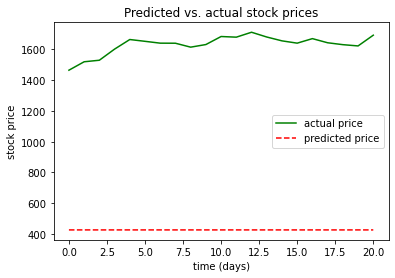

In [32]:
plt.plot(test_data, color='green', label='actual price', ls='-')
plt.plot(predicted, color='red', label='predicted price', ls='--')
plt.title('Predicted vs. actual stock prices')
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('stock price')
plt.show

Now, let's try and improve performance by tweaking our LSTM. There is no gold standard on how to build an LSTM; however, the following permutation combinations can be tried in order to improve performance:

- Build an LSTM with moderate units, such as 50
- Build an LSTM with over 100 units
- Use more data; that is, instead of 5 years, take data from 10 years
- Apply regularization using 100 units
- Apply regularization using 50 units
- Apply regularization using more data and 50 units

This list can have a number of combinations; whichever combination offers the best results can be considered a good algorithm for that particular dataset. In the next exercise, we will explore one of these options by adding more units to our LSTM layer and observing the performance.